In [4]:
# 1. Wczytaj plik sets.csv, wyświetl pierwsze 10 rekordów

import pandas as pd

df = pd.read_csv("sets.csv")

print(df.head(10))


       set_num                                   name  year  theme_id  \
0        001-1                                  Gears  1965         1   
1       0011-2                      Town Mini-Figures  1979        67   
2       0011-3             Castle 2 for 1 Bonus Offer  1987       199   
3       0012-1                     Space Mini-Figures  1979       143   
4       0013-1                     Space Mini-Figures  1979       143   
5       0014-1                     Space Mini-Figures  1979       143   
6       0015-1                     Space Mini-Figures  1979       143   
7       0016-1                    Castle Mini Figures  1979       189   
8        002-1         4.5V Samsonite Gears Motor Set  1965         1   
9  002253963-1  Legend of Chima: Corbeaux et Gorilles  2013       497   

   num_parts                                            img_url  
0         43   https://cdn.rebrickable.com/media/sets/001-1.jpg  
1         12  https://cdn.rebrickable.com/media/sets/0011-2.jpg 

In [5]:
# 2. Odczytaj ile jest rekordów w pliku

df.shape[0]
len(df)

21861

In [11]:
# 3. Wyświetl tylko nazwy zestawów - pierwsze 10 rekordów

df['name'].head(10)
df['name'][:10] # slicing, pierwsze 10 rekordów z kolumny o nazwie 'name'
df.iloc[:10,1] # slicing, pierwsze 10 rekordów w kolumnie nr 1

0                                    Gears
1                        Town Mini-Figures
2               Castle 2 for 1 Bonus Offer
3                       Space Mini-Figures
4                       Space Mini-Figures
5                       Space Mini-Figures
6                       Space Mini-Figures
7                      Castle Mini Figures
8           4.5V Samsonite Gears Motor Set
9    Legend of Chima: Corbeaux et Gorilles
Name: name, dtype: object

In [14]:
# 4. Zakres roczników - minimalny i maksymalny rok

df['year'].min()
df['year'].max()

2024

In [27]:
# 5. Filtrowanie: zostaw tylko rekordy, w których liczba elementów > 0

zeros = df[df['num_parts'] == 0] # podgląd na zestawy w których jest 0
erros = df[pd.to_numeric(df['num_parts'], errors='coerce').isna()] # podgląd na dane, gdyby pojawiło się coś innego niż liczba (Nan, wartość pusta, string itd)

# dane tylko dla zestawów z liczbą elementów > 0
df = df[df['num_parts'] > 0]
df.head(30)

set_num                                               name  year  \
0          001-1                                              Gears  1965   
1         0011-2                                  Town Mini-Figures  1979   
3         0012-1                                 Space Mini-Figures  1979   
4         0013-1                                 Space Mini-Figures  1979   
5         0014-1                                 Space Mini-Figures  1979   
6         0015-1                                 Space Mini-Figures  1979   
7         0016-1                                Castle Mini Figures  1979   
8          002-1                     4.5V Samsonite Gears Motor Set  1965   
9    002253963-1              Legend of Chima: Corbeaux et Gorilles  2013   
10         003-1                                Master Mechanic Set  1966   
11         005-1                    Basic Building Set in Cardboard  1965   
14         010-1                    Basic Building Set in Cardboard  1965   
15         010-2                                     Pre-School Set  1973   
16         010-3                                 Basic Building Set  1968   
18         1-Jan                                        Chain Links  1980   
19         011-1                                 Basic Building Set  1968   
20         2-Jan                              Bulldozer Chain Links  1982   
21         1-Feb                           Extra Large Tires & Hubs  1982   
22         021-1                                          Wheel Set  1966   
23         2-Feb                             Digger Bucket Assembly  1980   
24         022-1                                 Basic Building Set  1968   
25  0241187567-1                  Ninjago: Build Your Own Adventure  2015   
26  0241357594-1  Star Wars: Build Your Own Adventure: Galactic ...  2019   
27         028-1                                  Nursery Furniture  1979   
28         030-2                                       Building Set  1973   
29       03093-1                    The Race to Build It Board Game  1999   
30         1-Mar                                   Doors and Fences  1980   
31         032-1                                        Living Room  1979   
32         033-1                                       Farm Animals  1979   
33         033-2                                 Basic Building Set  1968   

    theme_id  num_parts                                            img_url  
0          1         43   https://cdn.rebrickable.com/media/sets/001-1.jpg  
1         67         12  https://cdn.rebrickable.com/media/sets/0011-2.jpg  
3        143         12  https://cdn.rebrickable.com/media/sets/0012-1.jpg  
4        143         12  https://cdn.rebrickable.com/media/sets/0013-1.jpg  
5        143          2  https://cdn.rebrickable.com/media/sets/0014-1.jpg  
6        143         18  https://cdn.rebrickable.com/media/sets/0015-1.jpg  
7        189         15  https://cdn.rebrickable.com/media/sets/0016-1.jpg  
8          1          3   https://cdn.rebrickable.com/media/sets/002-1.jpg  
9        497          4  https://cdn.rebrickable.com/media/sets/0022539...  
10       366        403   https://cdn.rebrickable.com/media/sets/003-1.jpg  
11       366         35   https://cdn.rebrickable.com/media/sets/005-1.jpg  
14       366         57   https://cdn.rebrickable.com/media/sets/010-1.jpg  
15       505         18   https://cdn.rebrickable.com/media/sets/010-2.jpg  
16       366         77   https://cdn.rebrickable.com/media/sets/010-3.jpg  
18       453         25    https://cdn.rebrickable.com/media/sets/01-1.jpg  
19       366        145   https://cdn.rebrickable.com/media/sets/011-1.jpg  
20       453         50    https://cdn.rebrickable.com/media/sets/01-2.jpg  
21       453          4    https://cdn.rebrickable.com/media/sets/02-1.jpg  
22       366        183   https://cdn.rebrickable.com/media/sets/021-1.jpg  
23       453          3    https://cdn.rebrickable.com/media/sets/02-2.jpg  
24  

In [49]:
# 6. Grupowanie: zestawy dla każdego roku

grouped = df.groupby('year') # grupowanie względem kolumny 'year'

# pętla po kolejnych rocznikach (mało czytelne dla całych tabel)
for year, year_group in grouped:
    print(year, len(year_group))
    print(year_group['name'])
    print()

1949 5
13135           Extra-Large Gift Set (ABB)
13148                 Large Gift Set (ABB)
13153                Medium Gift Set (ABB)
13159                Small Brick Set (ABB)
13160    Small Doors and Windows Set (ABB)
Name: name, dtype: object

1950 6
13137                       Single 2 x 4 Brick (ABB)
13140                       Single 2 x 2 Brick (ABB)
13161    Single 1 x 4 x 2 Window without Glass (ABB)
13162    Single 1 x 2 x 3 Window without Glass (ABB)
13163    Single 1 x 2 x 2 Window without Glass (ABB)
13164      Single 1 x 2 x 4 Door without Glass (ABB)
Name: name, dtype: object

1953 3
13144                              Individual 1 x 2 Bricks
13155                              Individual 2 x 3 Bricks
13172    Automatic Binding Bricks - Small Brick Set (Le...
Name: name, dtype: object

1954 14
13146                              Individual 2 x 8 Bricks
13147                             Individual 2 x 10 Bricks
13151                             Individual 2 x 12 Bricks
131

In [50]:
# 7. Ile zestawów wyszło w twoim roku urodzenia?

gr = grouped.get_group(1991) # tabela
len(gr)

145

In [66]:
# 8. Średnia i mediana ilości elementów w zestawach z roku urodzenia
gr['num_parts'].mean()
gr['num_parts'].median()

44.0

In [74]:
# 9. Nazwa największego zestawu w bazie

maxid = df['num_parts'].idxmax()
df.loc[maxid, 'name']

df.loc[maxid] # pełna tabela z danymi zestawu

#bonus - 5 największych zestawów
df.sort_values(by='num_parts', ascending=False).head(5)

set_num                           name  year  theme_id  num_parts  \
4293    31203-1                      World Map  2021       709      11695   
404     10307-1                   Eiffel Tower  2022       721      10001   
20601  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987   
390     10294-1                        Titanic  2021       721       9092   
371     10276-1                      Colosseum  2020       721       9036   

                                                 img_url  
4293   https://cdn.rebrickable.com/media/sets/31203-1...  
404    https://cdn.rebrickable.com/media/sets/10307-1...  
20601  https://cdn.rebrickable.com/media/sets/bigbox-...  
390    https://cdn.rebrickable.com/media/sets/10294-1...  
371    https://cdn.rebrickable.com/media/sets/10276-1...

In [85]:
# 10. Nazwa największego zestawu w twoim roku urodzenia

yr = df[df['year'] == 1991] # tabela zestawów z roku 1991
maxid = yr['num_parts'].idxmax()
yr.loc[maxid, 'name']

# yr.loc[maxid]

#lub korzystając z poprzednich danych:
# maxid = gr['num_parts'].idxmax()
# gr.loc[maxid, 'name']


'Giant Lego Topic Set'

In [99]:
# 11. Tabela: Dla każdego roku nazwa największego zestawu i ilość elementów

gr = df.groupby('year')
results = []

# dla każdego rocznika zbieramy największy zestaw i budujemy strukturę dla niego
for year, year_group in gr:
    id_largest = year_group['num_parts'].idxmax()
    largest = year_group.loc[id_largest]
    results.append([year, largest['name'], largest['num_parts']]) # dodanie nowej struktury - same nazwy/liczby!

results_df = pd.DataFrame(results, columns=['year', 'name', 'num_parts']) # nowy DataFrame z nazwami kolumn
results_df[-40:] # ostatnie 40 lat

# wersja level harder ;-)

# result = df.groupby('year').apply(lambda group: group.loc[group['num_parts'].idxmax()])
# result[['year', 'name', 'num_parts']].reset_index(drop=True)

year                                name  num_parts
33  1984                 Community Buildings        899
34  1985               Teachers Resource Set       1534
35  1986                         Highway Rig        668
36  1987                  Basic Building Set        721
37  1988                            Test Car        898
38  1989                Black Seas Barracuda        918
39  1990           4.5V Technic Resource Set       1534
40  1991                Giant Lego Topic Set       2195
41  1992                    Airtech Claw Rig        954
42  1993                Skull's Eye Schooner        924
43  1994                           Super Car       1346
44  1995             Technology Resource Set       1730
45  1996               Bonus Lego Basic Town       2542
46  1997          Giant Lego Dacta Basic Set       1417
47  1998        ROBOLAB Starter Building Set       1712
48  1999              Super Street Sensation       1406
49  2000                   Statue of Liberty       2899
50  2001                          Darth Maul       1868
51  2002             Imperial Star Destroyer       3116
52  2003                    Lego Mosaic Dino       2847
53  2004            Better Building More Fun       2000
54  2005  Star Wars / M&M Mosaic - Promo Set       5462
55  2006                            XXL 2000       2000
56  2007                   Millennium Falcon       5198
57  2008                           Taj Mahal       5922
58  2009                      Grand Carousel       3261
59  2010              Window Exploration Bag       5200
60  2011                Super Star Destroyer       3152
61  2012                           Town Hall       2772
62  2013                  Sydney Opera House       2989
63  2014                         Sandcrawler       3296
64  2015       The Ultimate Battle for Chima       9987
65  2016              Firehouse Headquarters       4642
66  2017                   Millennium Falcon       7541
67  2018                     Hogwarts Castle       6020
68  2019             Imperial Star Destroyer       4784
69  2020                           Colosseum       9036
70  2021                           World Map      11695
71  2022                        Eiffel Tower      10001
72  2023        Lord of the Rings: Rivendell       6182

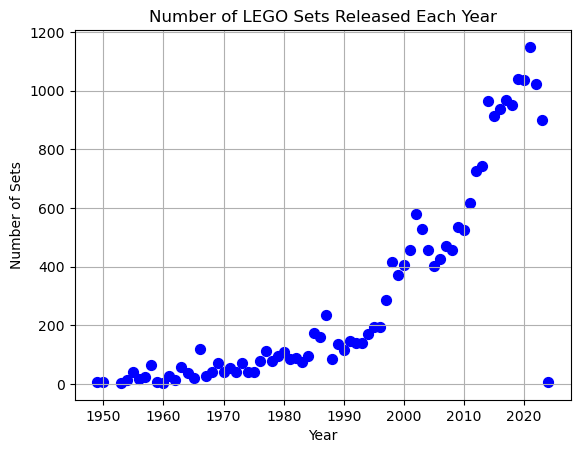

In [21]:
# 12. Wykres punktowy: liczba zestawów wydanych w danym roku

import matplotlib.pyplot as plt

sets_years = df.groupby('year').size().reset_index(name='num_sets') # reset_index służy do nadania kolumnie nazwy
sets_years

# redukcja - ostatnie 10 lat
# sets_years = sets_years[-10:]

X = sets_years['year']
Y = sets_years['num_sets']
plt.scatter(X, Y, marker='o', s=50, c='blue') # niebieskie kółka
# plt.plot(X,Y, 'r.-')  # czerwone kropki: r-red, . kropka, - połączone linią

plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Sets Released Each Year')

plt.grid(True) # siatka
#plt.legend() # legenda - dla większej ilości danych

plt.show()



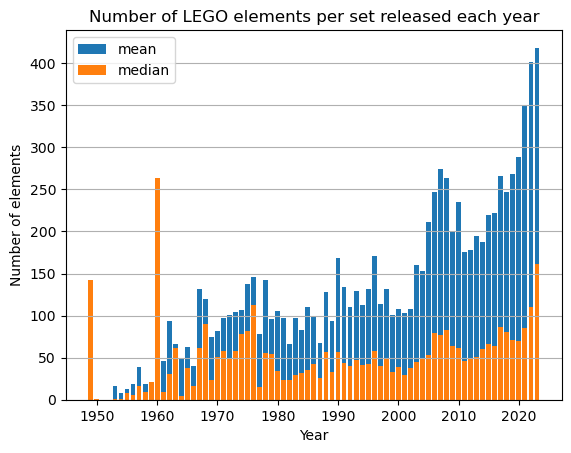

In [123]:
# 13. Wykres słupkowy: średnia i mediana liczby elementów w zestawach w danym roku

agg_years = df.groupby('year')['num_parts'].agg(['mean', 'median']).reset_index()

# agg_years[-30:] 

plt.bar(agg_years['year'], agg_years['mean'], label='mean')
plt.bar(agg_years['year'], agg_years['median'], label='median')

plt.xlabel('Year')
plt.ylabel('Number of elements')
plt.title('Number of LEGO elements per set released each year')

plt.legend()
plt.grid(axis='y') # siatka pozioma


In [153]:
# 14. "Wyszukiwarka": Tabela zestawów z danym słowem w nazwie (np. Star Wars, Ninjago, Pirates) (dodatkowo: case insensitive)

word = "Star Wars"
df1 = df[df['name'].str.contains(word)] # case= True/False do łapania dużych i małych liter
print(len(df1)) # ile wyników
df1

# wersja hard z regexpami - dokładnie dane słowo
# word_regex = r'\bcity\b'
# df2 = df[df['name'].str.contains(word_regex, case=True, regex=True)]
# df2

112


set_num                                               name  year  \
26     0241357594-1  Star Wars: Build Your Own Adventure: Galactic ...  2019   
1904   1838526773-1                    Star Wars: Official Annual 2020  2019   
3311      2853508-1                   Star Wars: The Visual Dictionary  2009   
3336      2855113-1                             Star Wars: Brickmaster  2011   
4482       330059-1         Armor Case Kit for Nintendo DS - Star Wars  2009   
...             ...                                                ...   ...   
21708        SWMP-1                 Star Wars / M&M Mosaic - Promo Set  2005   
21712        tf05-1       Lego Toy Fair 2005 Star Wars V.I.P. Gala Set  2005   
21713        tf11-1  Star Wars Miniland Figures (Toy Fair 2011 Coll...  2011   
21792   TRUXWING2-1                           Star Wars X-wing Fighter  2015   
21811         VP-10       Star Wars Value Pack with Free LEGO Backpack  2003   

       theme_id  num_parts                                            img_url  
26          497         70  https://cdn.rebrickable.com/media/sets/0241357...  
1904        497          5  https://cdn.rebrickable.com/media/sets/1838526...  
3311        497          4  https://cdn.rebrickable.com/media/sets/2853508...  
3336        497        251  https://cdn.rebrickable.com/media/sets/2855113...  
4482        742         22  https://cdn.rebrickable.com/media/sets/330059-...  
...         ...        ...                                                ...  
21708       158       5462  https://cdn.rebrickable.com/media/sets/swmp-1.jpg  
21712       158         60  https://cdn.rebrickable.com/media/sets/tf05-1.jpg  
21713       158        138  https://cdn.rebrickable.com/media/sets/tf11-1.jpg  
21792       158         27  https://cdn.rebrickable.com/media/sets/truxwin...  
21811       158          1   https://cdn.rebrickable.com/media/sets/vp-10.jpg  

[112 rows x 6 columns]

In [14]:
# 15. Łączenie danych: otwórz plik themes.csv i w danych zestawów zamień id serii na nazwę serii z pliku themes
sets_df = pd.read_csv("sets.csv")
themes_df = pd.read_csv("themes.csv")


# z użyciem mapowania:
# sets_df['theme_id'] = sets_df['theme_id'].map(themes_df.set_index('id')['name'])
# sets_df.rename(columns={'theme_id': 'theme'}, inplace=True) # zmiana nazwy kolumny
# sets_df

# z użyciem merge:
# Połącz dane zestawów z danymi serii na podstawie identyfikatora serii
merged_df = sets_df.merge(themes_df[['id', 'name']], left_on='theme_id', right_on='id', how='left')
merged_df.rename(columns={'name_y': 'theme_name'}, inplace=True) # zmiana nazwy kolumny
merged_df.drop(columns=['id','theme_id'], inplace=True) # usunięcie zbędnych kolumn 'id' i 'theme_id'

merged_df[:30]

set_num                                             name_x  year  \
0          001-1                                              Gears  1965   
1         0011-2                                  Town Mini-Figures  1979   
2         0011-3                         Castle 2 for 1 Bonus Offer  1987   
3         0012-1                                 Space Mini-Figures  1979   
4         0013-1                                 Space Mini-Figures  1979   
5         0014-1                                 Space Mini-Figures  1979   
6         0015-1                                 Space Mini-Figures  1979   
7         0016-1                                Castle Mini Figures  1979   
8          002-1                     4.5V Samsonite Gears Motor Set  1965   
9    002253963-1              Legend of Chima: Corbeaux et Gorilles  2013   
10         003-1                                Master Mechanic Set  1966   
11         005-1                    Basic Building Set in Cardboard  1965   
12         005-2                                      Discovery Set  1967   
13          00-6                                      Special Offer  1985   
14         010-1                    Basic Building Set in Cardboard  1965   
15         010-2                                     Pre-School Set  1973   
16         010-3                                 Basic Building Set  1968   
17      010423-1                                 The Majestic Horse  2023   
18         1-Jan                                        Chain Links  1980   
19         011-1                                 Basic Building Set  1968   
20         2-Jan                              Bulldozer Chain Links  1982   
21         1-Feb                           Extra Large Tires & Hubs  1982   
22         021-1                                          Wheel Set  1966   
23         2-Feb                             Digger Bucket Assembly  1980   
24         022-1                                 Basic Building Set  1968   
25  0241187567-1                  Ninjago: Build Your Own Adventure  2015   
26  0241357594-1  Star Wars: Build Your Own Adventure: Galactic ...  2019   
27         028-1                                  Nursery Furniture  1979   
28         030-2                                       Building Set  1973   
29       03093-1                    The Race to Build It Board Game  1999   

    num_parts                                            img_url  \
0          43   https://cdn.rebrickable.com/media/sets/001-1.jpg   
1          12  https://cdn.rebrickable.com/media/sets/0011-2.jpg   
2           0  https://cdn.rebrickable.com/media/sets/0011-3.jpg   
3          12  https://cdn.rebrickable.com/media/sets/0012-1.jpg   
4          12  https://cdn.rebrickable.com/media/sets/0013-1.jpg   
5           2  https://cdn.rebrickable.com/media/sets/0014-1.jpg   
6          18  https://cdn.rebrickable.com/media/sets/0015-1.jpg   
7          15  https://cdn.rebrickable.com/media/sets/0016-1.jpg   
8           3   https://cdn.rebrickable.com/media/sets/002-1.jpg   
9           4  https://cdn.rebrickable.com/media/sets/0022539...   
10        403   https://cdn.rebrickable.com/media/sets/003-1.jpg   
11         35   https://cdn.rebrickable.com/media/sets/005-1.jpg   
12          0   https://cdn.rebrickable.com/media/sets/005-2.jpg   
13          0    https://cdn.rebrickable.com/media/sets/00-6.jpg   
14         57   https://cdn.rebrickable.com/media/sets/010-1.jpg   
15         18   https://cdn.rebrickable.com/media/sets/010-2.jpg   
16         77   https://cdn.rebrickable.com/media/sets/010-3.jpg   
17          0  https://cdn.rebrickable.com/media/sets/010423-...   
18         25    https://cdn.rebrickable.com/media/sets/01-1.jpg   
19        145   https://cdn.rebrickable.com/media/sets/011-1.jpg   
20         50    https://cdn.rebrickable.com/media/sets/01-2.jpg   
21          4    https://cdn.rebrickable.com/media/sets/02-1.jpg   
22        183   https://cdn.rebrickable.com/media/sets/02

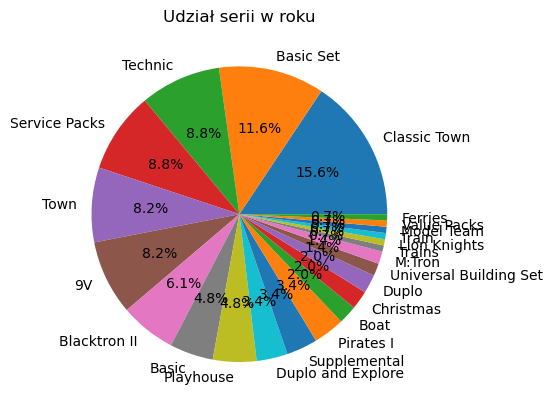

In [49]:
# 16. Wykres kołowy: “udział” danej serii (liczba zestawów) w roku urodzenia

# można też korzystać z oryginalnej df - ale mamy na niej tylko theme_id (mniej czytelne)

yr = merged_df[ merged_df['year'] == 1991 ]
counts = yr['theme_name'].value_counts()

counts

plt.pie(counts, labels=counts.index, autopct='%1.1f%%') # autopct -> formatowanie procentów (1 miejsce po przecinku)
plt.title('Udział serii w roku')
plt.show()

# czytelniej - uwzględnij tylko dane <3%, a reszta zgrupowana jako "other"
# threshold = 0.03 * len(yr) #3% z ilości wszystkich danych
# data_show = counts[ counts >= threshold ] # pozostaw tylko dane dla >3%
# other = counts[ counts < threshold ] # zachowaj pozostałe dane

# data_show['other'] = other.sum() # ale nie len! - len to ilość rekordów!
# data_show
# other

# plt.pie(data_show, labels=data_show.index, autopct='%1.1f%%')
# plt.title('Udział serii w roku')
# plt.show()


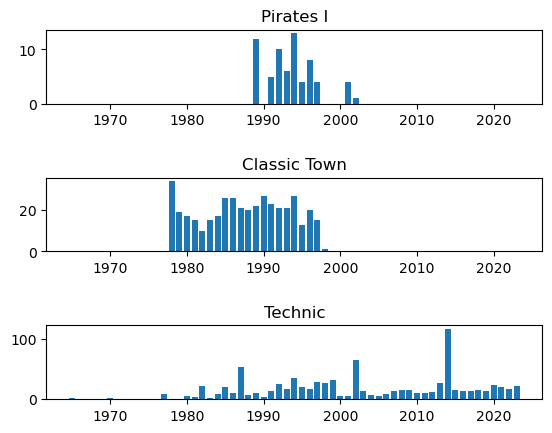

In [82]:
# 17. Wykresy na jednym ekranie: liczba zestawów z 3 określonych serii (np. Pirates I, Classic Town, Technic) w kolejnych latach

# Wybierz zestawy z wybranymi seriami
series = ['Pirates I', 'Classic Town', 'Technic']

# tu musimy zastosować regex - kreska oznacza "OR" -> czyli nazwa to "seria1 | seria2 | seria3"
selected_series = merged_df[ merged_df['theme_name'].str.contains('|'.join(series), case=False, regex=True)]

# grupowanie według serii i roku
grouped = selected_series.groupby(['year', 'theme_name']).size().unstack(fill_value=0)

# wykresy z subplotami (prosta konstrukcja, można też korzystać z: fig, axes = plt.subplots(...))
plt.subplot(3,1,1)
plt.bar(grouped.index, grouped[ series[0] ])
plt.title( series[0] )

plt.subplot(3,1,2)
plt.bar(grouped.index, grouped[ series[1] ])
plt.title( series[1] )

plt.subplot(3,1,3)
plt.bar(grouped.index, grouped[ series[2] ])
plt.title( series[2] )

plt.subplots_adjust(hspace=1) # odstęp pomiędzy wykresami

plt.show()

# szybka pętla po danych
# for i,item in enumerate(series):
#     plt.subplot(len(series),1,i+1)
#     plt.bar(grouped.index, grouped[ series[i] ])
#     plt.title( series[i] )
    
# plt.subplots_adjust(hspace=1)
# plt.show()


In [86]:
# 18. Zapis danych: 
# Tabela w CSV, w której uwzględnione są tylko zestawy z ilością elementów >0, 
# z nazwami serii zamiast id oraz bez kolumny url do zdjęć; 
# posortowane rocznikami; a dane w rocznikach posortowane numerami zestawów. 
# Kolumny w tabeli: rocznik, numer, nazwa, seria, ilość elementów.


# mamy już merged_df i z niego skorzystamy - warto przećwiczyć wszystkie etapy przetwarzania od wczytania oryginalnych danych

filtered_df = merged_df[merged_df['num_parts'] > 0]
filtered_df = filtered_df[['year', 'set_num', 'name_x', 'theme_name', 'num_parts']] # zostaw określone kolumny
filtered_df = filtered_df.sort_values(['year', 'set_num']) # sortowanie w kolejnych kolumnach

filtered_df
filtered_df.to_csv('filtered_sets.csv', index=False) # zapis danych do CSV
